In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from matplotlib.colors import ListedColormap


In [2]:
df=pd.read_csv("Information for Accommodation.csv",encoding='ascii')

In [3]:
df.describe()

,Rooms,Logitiute,Latitude
count,2130.000000,1368.000000,1370.000000
mean,16.961972,80.430743,7.058470
std,36.657709,0.509183,2.119415
min,1.000000,79.705919,5.936771
25%,4.000000,79.967549,6.452453
50%,6.000000,80.396191,6.915005
75%,14.000000,80.729967,7.287510
max,541.000000,81.856883,80.791643


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2130 entries, 0 to 2129
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Type          2130 non-null   object 
 1   Name          2130 non-null   object 
 2   Address       2130 non-null   object 
 3   Rooms         2130 non-null   int64  
 4   Grade         1837 non-null   object 
 5   District      2130 non-null   object 
 6   AGA Division  2111 non-null   object 
 7   PS/MC/UC      2127 non-null   object 
 8   Logitiute     1368 non-null   float64
 9   Latitude      1370 non-null   float64
dtypes: float64(2), int64(1), object(7)
memory usage: 166.5+ KB


In [5]:
df.head()

,Type,Name,Address,Rooms,Grade,District,AGA Division,PS/MC/UC,Logitiute,Latitude
0,Boutique Hotels,THE THEVA RESIDENCY,"11/B5/10-1 06TH LANE, HANTANA,KANDY",10,NaN,Kandy,Kandy Divisional Secretariat,Kandy,80.635411,7.276036
1,Boutique Hotels,HIGHLAND VILLA,"351, ABIMANGAMA ROAD, KUMBALGAMA, WELIGAMA",10,NaN,Matara,Weligama Divisional Secretariat,Weligama Pradeshiya Sabha,80.409972,5.960334
2,Boutique Hotels,ULAGALLA WALAWWA RESORT,"THIRAPPANE, ANURADHAPURA",21,NaN,Anuradhapura,Anuradhapura East,Anuradhapura,80.545063,8.205927
3,Boutique Hotels,GALLE FORT HOTEL,"NO.28, CHURCH STREET, FORT , GALLE",14,NaN,Galle,Galle Divisional Secretariat,Galle,80.217563,6.026649
4,Boutique Hotels,THE ELEPHANT CORRIDOR,"POTHANA,KIBISSA, SIGIRIYA",21,NaN,Matale,NaN,Matale,80.710743,7.943525


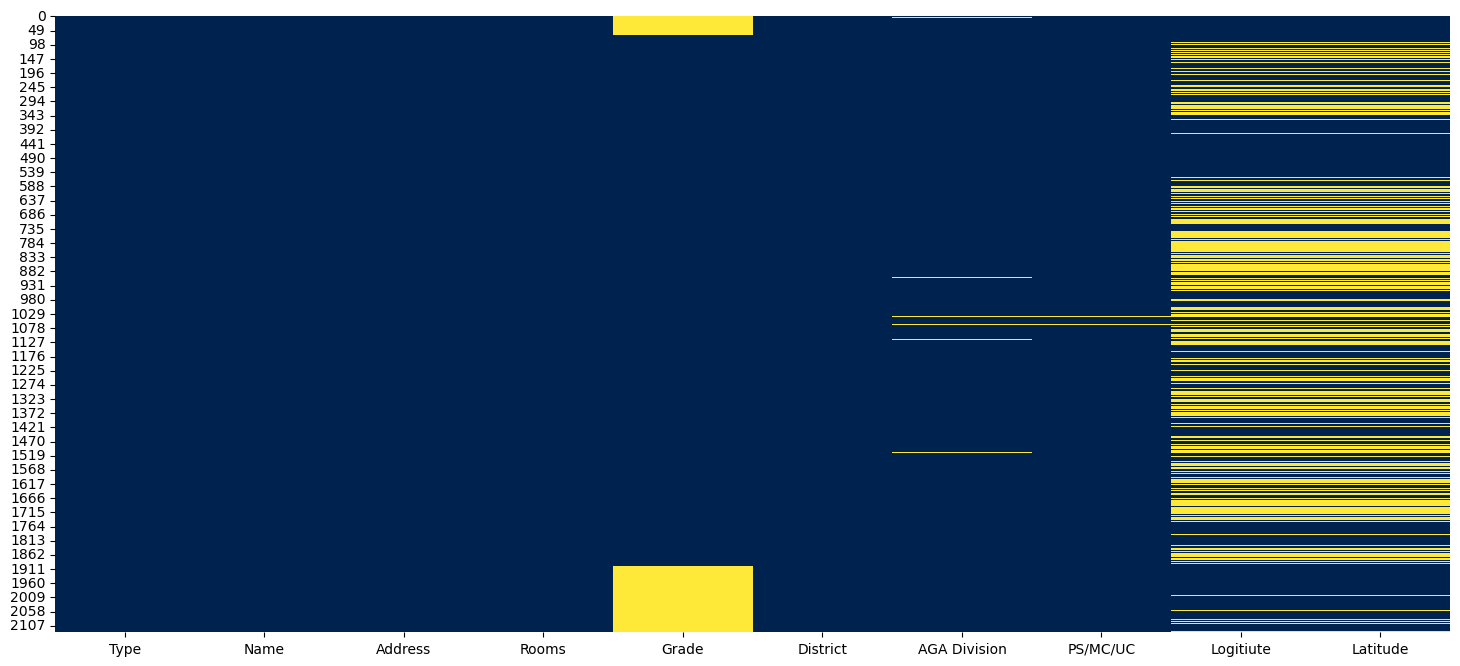

In [6]:
plt.figure(figsize=(18,8))

sns.heatmap(df.isnull(),cbar=False,cmap='cividis')
plt.show()

In [7]:
# df.groupby('Type')['Rooms'].size()
df['Type'].value_counts()

Type
Guest Houses                    894
Home Stay Units                 378
Bangalows                       348
Tourist Hotels                  229
Classified Hotels( 1-5 Star)    141
Rented Apartments                64
Boutique Villas                  36
Boutique Hotels                  28
Rented Homes                      6
Heritage Bungalows                4
Heritage Homes                    2
Name: count, dtype: int64

In [8]:
room_types_count=df.groupby('Type')['Rooms'].size().reset_index()

In [9]:
room_types_count

,Type,Rooms
0,Bangalows,348
1,Boutique Hotels,28
2,Boutique Villas,36
3,Classified Hotels( 1-5 Star),141
4,Guest Houses,894
5,Heritage Bungalows,4
6,Heritage Homes,2
7,Home Stay Units,378
8,Rented Apartments,64
9,Rented Homes,6


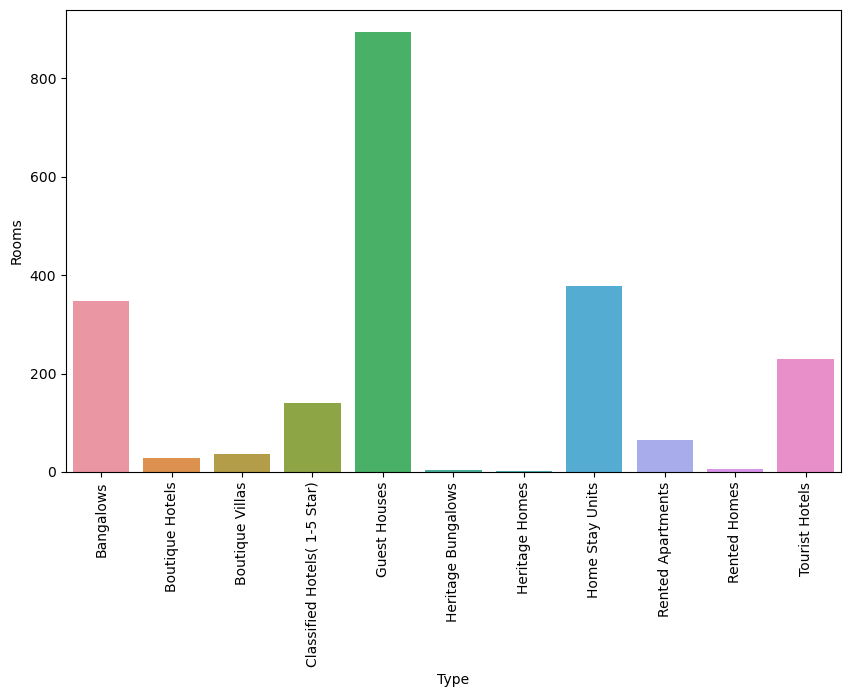

In [10]:
plt.figure(figsize=(10,6),facecolor='white')
sns.barplot(data=room_types_count,x='Type',y='Rooms')
plt.xticks(rotation=90)
plt.show()

In [11]:
df.groupby('Type')['Rooms'].mean()

Type
Bangalows                        4.201149
Boutique Hotels                 20.142857
Boutique Villas                  6.583333
Classified Hotels( 1-5 Star)    90.978723
Guest Houses                    10.833333
Heritage Bungalows               4.750000
Heritage Homes                   4.000000
Home Stay Units                  3.010582
Rented Apartments                3.234375
Rented Homes                     3.166667
Tourist Hotels                  43.502183
Name: Rooms, dtype: float64

In [12]:
avg_rooms_by_type=df.groupby('Type')['Rooms'].mean().reset_index()

In [13]:
avg_rooms_by_type

,Type,Rooms
0,Bangalows,4.201149
1,Boutique Hotels,20.142857
2,Boutique Villas,6.583333
3,Classified Hotels( 1-5 Star),90.978723
4,Guest Houses,10.833333
5,Heritage Bungalows,4.750000
6,Heritage Homes,4.000000
7,Home Stay Units,3.010582
8,Rented Apartments,3.234375
9,Rented Homes,3.166667


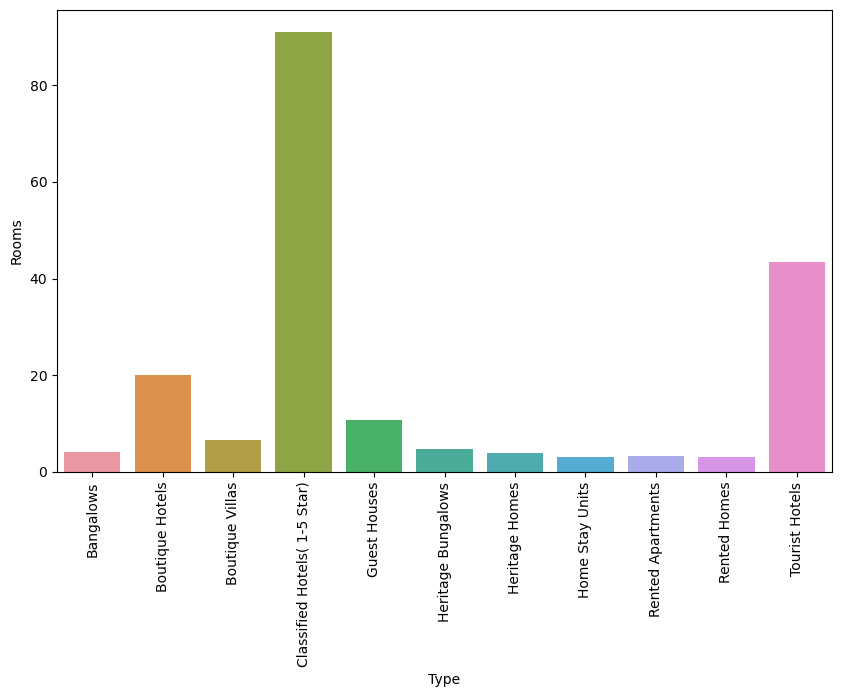

In [14]:
plt.figure(figsize=(10,6),facecolor='white')

sns.barplot(data=avg_rooms_by_type,x='Type',y='Rooms')
plt.xticks(rotation=90)
plt.show()

In [41]:
# Calculate the total number of rooms in Western Province districts and overall
df['Western Province'] = df['District'].apply(lambda x: x in ['Colombo', 'Kalutara', 'Gampaha'])
western_rooms = df[df['Western Province']]['Rooms'].sum()
total_rooms = df['Rooms'].sum()

# Calculate the percentage
percentage = (western_rooms / total_rooms) * 100
print(f'Total number of rooms in Western Province: {western_rooms}')
print(f'Total number of rooms overall: {total_rooms}')
print(f'Percentage of rooms in Western Province: {percentage:.2f}%')

Total number of rooms in Western Province: 14347
Total number of rooms overall: 36129
Percentage of rooms in Western Province: 39.71%


In [42]:
# Calculate the percentage of rooms for specified districts as a percentage of total rooms
districts = ['Colombo', 'Kalutara', 'Gampaha', 'Puttalam', 'Mannar', 'Jaffna', 'Matara', 'Galle', 'Hambantota', 'Trincomalee', 'Batticaloa']
district_rooms = df[df['District'].isin(districts)]['Rooms'].sum()

# Calculate the percentage
percentage_districts = (district_rooms / total_rooms) * 100
print(f'Total number of rooms in specified districts: {district_rooms}')
print(f'Percentage of rooms in specified districts: {percentage_districts:.2f}%')

Total number of rooms in specified districts: 25437
Percentage of rooms in specified districts: 70.41%


In [15]:
df.head()

,Type,Name,Address,Rooms,Grade,District,AGA Division,PS/MC/UC,Logitiute,Latitude
0,Boutique Hotels,THE THEVA RESIDENCY,"11/B5/10-1 06TH LANE, HANTANA,KANDY",10,NaN,Kandy,Kandy Divisional Secretariat,Kandy,80.635411,7.276036
1,Boutique Hotels,HIGHLAND VILLA,"351, ABIMANGAMA ROAD, KUMBALGAMA, WELIGAMA",10,NaN,Matara,Weligama Divisional Secretariat,Weligama Pradeshiya Sabha,80.409972,5.960334
2,Boutique Hotels,ULAGALLA WALAWWA RESORT,"THIRAPPANE, ANURADHAPURA",21,NaN,Anuradhapura,Anuradhapura East,Anuradhapura,80.545063,8.205927
3,Boutique Hotels,GALLE FORT HOTEL,"NO.28, CHURCH STREET, FORT , GALLE",14,NaN,Galle,Galle Divisional Secretariat,Galle,80.217563,6.026649
4,Boutique Hotels,THE ELEPHANT CORRIDOR,"POTHANA,KIBISSA, SIGIRIYA",21,NaN,Matale,NaN,Matale,80.710743,7.943525


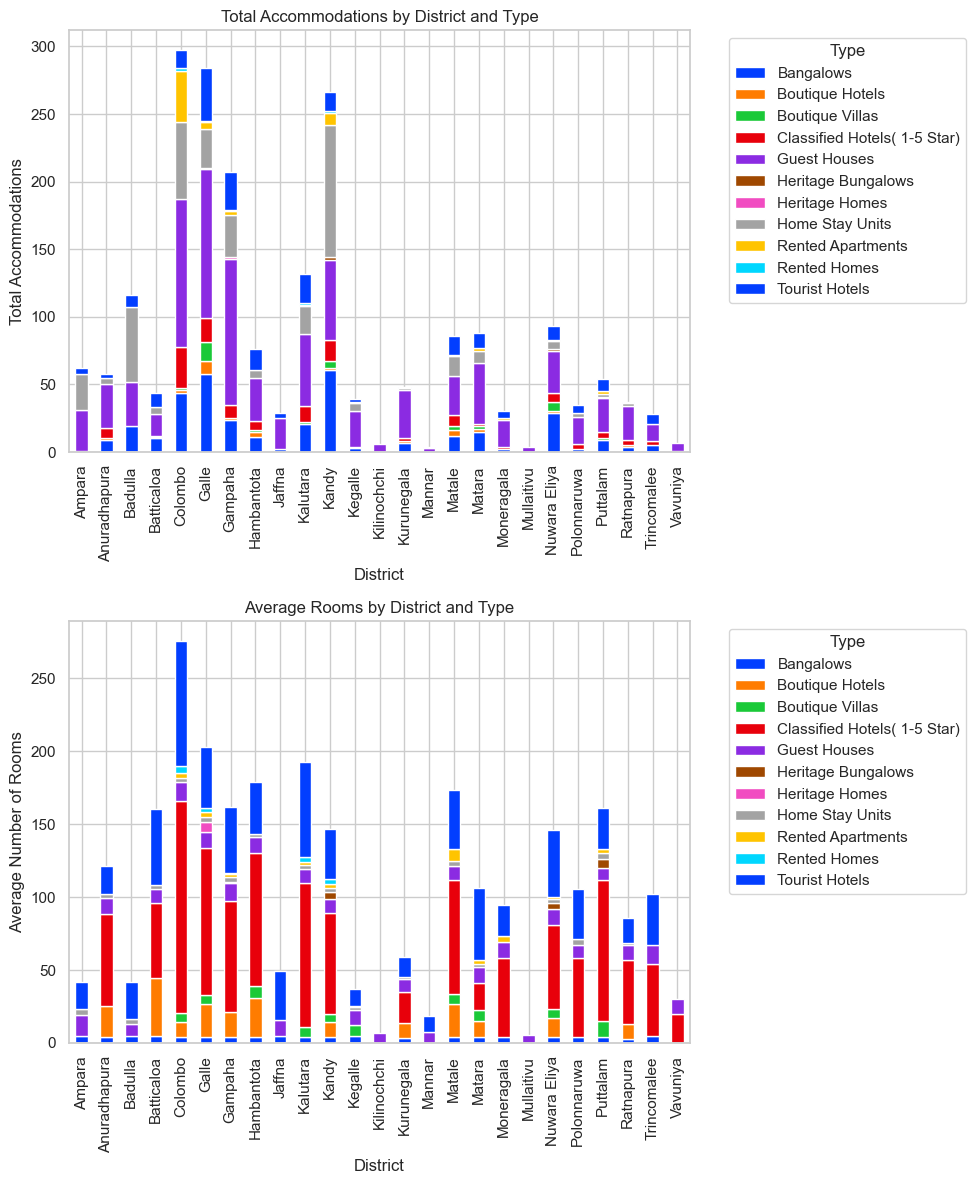

In [16]:
pivot_total = df.pivot_table(index='District', columns='Type', values='Rooms', aggfunc='count', fill_value=0)

# Pivot the data to get the average rooms by district and type
pivot_avg = df.pivot_table(index='District', columns='Type', values='Rooms', aggfunc='mean', fill_value=0)

# Set the background style
sns.set(style='whitegrid')

# Define a more attractive color palette and create a colormap
palette = sns.color_palette('bright', n_colors=pivot_total.columns.size)
colormap = ListedColormap(palette)

# Create a figure and a set of subplots
fig, axs = plt.subplots(2, 1, figsize=(10, 12), facecolor='white')

# Plot total accommodations by district and type as a stacked barplot
pivot_total.plot(kind='bar', stacked=True, ax=axs[0],colormap=colormap)
axs[0].set_title('Total Accommodations by District and Type')
axs[0].set_ylabel('Total Accommodations')
axs[0].legend(title='Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# Plot average rooms by district and type as a stacked barplot
pivot_avg.plot(kind='bar', stacked=True, ax=axs[1],colormap=colormap)
axs[1].set_title('Average Rooms by District and Type')
axs[1].set_ylabel('Average Number of Rooms')
axs[1].legend(title='Type', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

In [17]:
df.head()

,Type,Name,Address,Rooms,Grade,District,AGA Division,PS/MC/UC,Logitiute,Latitude
0,Boutique Hotels,THE THEVA RESIDENCY,"11/B5/10-1 06TH LANE, HANTANA,KANDY",10,NaN,Kandy,Kandy Divisional Secretariat,Kandy,80.635411,7.276036
1,Boutique Hotels,HIGHLAND VILLA,"351, ABIMANGAMA ROAD, KUMBALGAMA, WELIGAMA",10,NaN,Matara,Weligama Divisional Secretariat,Weligama Pradeshiya Sabha,80.409972,5.960334
2,Boutique Hotels,ULAGALLA WALAWWA RESORT,"THIRAPPANE, ANURADHAPURA",21,NaN,Anuradhapura,Anuradhapura East,Anuradhapura,80.545063,8.205927
3,Boutique Hotels,GALLE FORT HOTEL,"NO.28, CHURCH STREET, FORT , GALLE",14,NaN,Galle,Galle Divisional Secretariat,Galle,80.217563,6.026649
4,Boutique Hotels,THE ELEPHANT CORRIDOR,"POTHANA,KIBISSA, SIGIRIYA",21,NaN,Matale,NaN,Matale,80.710743,7.943525


In [18]:
loc_per_district=df.groupby('District').size()

In [19]:
loc_per_district

District
Ampara           62
Anuradhapura     58
Badulla         116
Batticaloa       44
Colombo         297
Galle           284
Gampaha         207
Hambantota       76
Jaffna           29
Kalutara        132
Kandy           266
Kegalle          39
Kilinochchi       6
Kurunegala       48
Mannar            4
Matale           86
Matara           88
Moneragala       30
Mullaitivu        4
Nuwara Eliya     93
Polonnaruwa      35
Puttalam         54
Ratnapura        37
Trincomalee      28
Vavuniya          7
dtype: int64

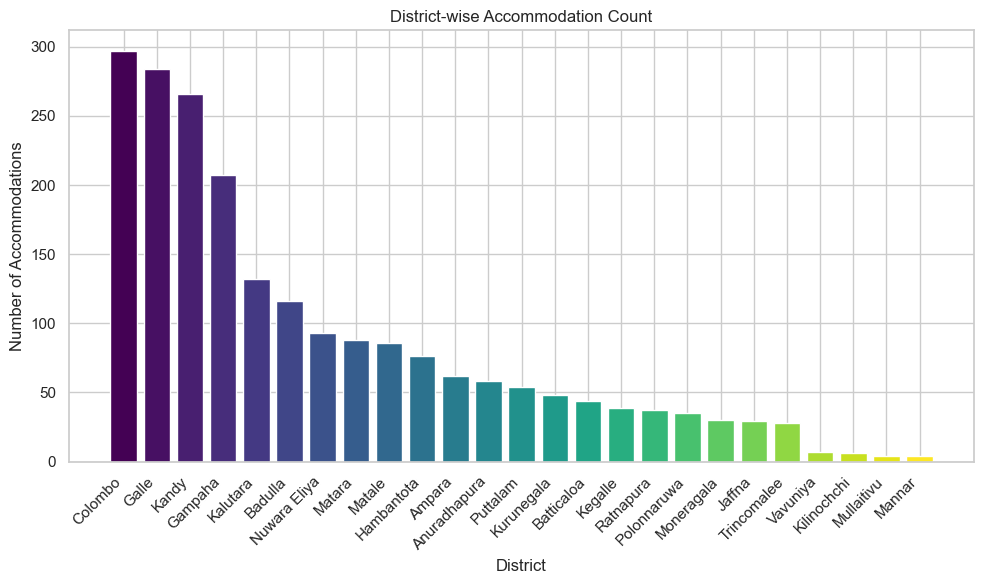

In [20]:
# Count the number of accommodations by district
district_counts = df['District'].value_counts()
# Generate a color array
colors = plt.cm.viridis(np.linspace(0, 1, len(district_counts)))
# Plotting
plt.figure(figsize=(10, 6), facecolor='white')
plt.bar(district_counts.index, district_counts.values, color=colors)
plt.xlabel('District')
plt.ylabel('Number of Accommodations')
plt.xticks(rotation=45, ha='right')
plt.title('District-wise Accommodation Count')
plt.tight_layout()
plt.show()

In [21]:
df.head()

,Type,Name,Address,Rooms,Grade,District,AGA Division,PS/MC/UC,Logitiute,Latitude
0,Boutique Hotels,THE THEVA RESIDENCY,"11/B5/10-1 06TH LANE, HANTANA,KANDY",10,NaN,Kandy,Kandy Divisional Secretariat,Kandy,80.635411,7.276036
1,Boutique Hotels,HIGHLAND VILLA,"351, ABIMANGAMA ROAD, KUMBALGAMA, WELIGAMA",10,NaN,Matara,Weligama Divisional Secretariat,Weligama Pradeshiya Sabha,80.409972,5.960334
2,Boutique Hotels,ULAGALLA WALAWWA RESORT,"THIRAPPANE, ANURADHAPURA",21,NaN,Anuradhapura,Anuradhapura East,Anuradhapura,80.545063,8.205927
3,Boutique Hotels,GALLE FORT HOTEL,"NO.28, CHURCH STREET, FORT , GALLE",14,NaN,Galle,Galle Divisional Secretariat,Galle,80.217563,6.026649
4,Boutique Hotels,THE ELEPHANT CORRIDOR,"POTHANA,KIBISSA, SIGIRIYA",21,NaN,Matale,NaN,Matale,80.710743,7.943525


In [22]:
new_df=df.dropna(subset=['Logitiute','Latitude','Grade'])

In [23]:
new_df

,Type,Name,Address,Rooms,Grade,District,AGA Division,PS/MC/UC,Logitiute,Latitude
64,Bangalows,KIVGA HOLIDAY HOME,"4C/8 FIRST STAGE, MIHINDU MAWATHA, ANURADHAPURA",4,DELUXE,Anuradhapura,Anuradhapura,Anuradhapura East,80.416952,8.333752
65,Bangalows,VILLA SUNBIRD,"89B, WELLAMANKARAYA, OFF HUE FERNANDO MAWATHA,...",6,DELUXE,Puttalam,Polonnaruwa,Wennappuwa Divisional Secretariat,79.837662,7.306926
66,Bangalows,COMILLA BUNGALOW,"""COMILLA WATHE"" 76/5, INDURUGALLA, WATHURUGAMA",3,DELUXE,Gampaha,Gampaha,Dompe Divisional Secretariat,80.094262,7.056691
68,Bangalows,SACHAL MIR'S,"2-C, DUNGALPITIYA, THALAHENA, NEGAMBO",4,SUPERIOR,Gampaha,Negombo,Negombo Divisional Secretariat,79.831100,7.152417
69,Bangalows,MISTY HILLS BOUTIQUE COTTAGE,"20/23,TOP PASS, KANDY ROAD, NUWARAELIYA.(VIA S...",4,DELUXE,Nuwara Eliya,Nuwara Eliya,Nuwara Eliya Divisional Secretariat,80.745867,6.990672
...,...,...,...,...,...,...,...,...,...,...
1895,Rented Homes,TRAVELLERS REST HOME,"13C, BUWANEKABA ROAD, SINGHEPITIYA, GAMPOLA",3,STANDARD,Kandy,Gampola,Kandy Divisional Secretariat,80.560632,7.159357
1897,Rented Homes,AIRPORT NEAR REST,"245/31, CHURCH ROAD, RANAWIRU MAWATHA, LIYANAG...",1,STANDARD,Gampaha,Seeduwa,Katana Divisional Secretariat,79.875283,7.136658
1898,Rented Homes,AVON VILLA,"NO. 61/30, THUDUWEGODA ROAD, AMARASENA MAWATHA...",3,STANDARD,Galle,Hikkaduwa,Hikkaduwa Divisional Secretariat,80.100697,6.139111
1899,Rented Homes,SAVENRA GARDEN RESORT,"13A, RATHABALAHENA ESTATE, PADUKKA ROAD, GODAG...",5,SUPERIOR,Colombo,Homagama Pradeshiya Sabha,Homagama Divisional Secretariat,80.036651,6.850166


In [24]:
!pip install geopandas


In [25]:
!pip install keplergl

In [26]:

import pandas as pd
import geopandas as gpd
from keplergl import KeplerGl





# Convert DataFrame to GeoDataFrame
gdf = gpd.GeoDataFrame(new_df, geometry=gpd.points_from_xy(new_df.Logitiute,new_df.Latitude))

# Create a KeplerGl map
map_3d = KeplerGl(height=600)

# Add the GeoDataFrame to the map
map_3d.add_data(data=gdf, name='accommodations')



User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


c:\Users\amila.w\AppData\Local\anaconda3\Lib\site-packages\jupyter_client\session.py:718: UserWarning: Message serialization failed with:
Out of range float values are not JSON compliant
Supporting this message is deprecated in jupyter-client 7, please make sure your message is JSON-compliant
  content = self.pack(content)


In [27]:
map_3d

KeplerGl(data={'accommodations': {'index': [64, 65, 66, 68, 69, 70, 71, 73, 74, 76, 79, 80, 81, 83, 84, 87, 88…

In [28]:
map_3d.save_to_html(file_name='3d_accommodation_visualization.html')

Map saved to 3d_accommodation_visualization.html!


In [29]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1095 entries, 64 to 1900
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Type          1095 non-null   object 
 1   Name          1095 non-null   object 
 2   Address       1095 non-null   object 
 3   Rooms         1095 non-null   int64  
 4   Grade         1095 non-null   object 
 5   District      1095 non-null   object 
 6   AGA Division  1088 non-null   object 
 7   PS/MC/UC      1094 non-null   object 
 8   Logitiute     1095 non-null   float64
 9   Latitude      1095 non-null   float64
dtypes: float64(2), int64(1), object(7)
memory usage: 94.1+ KB


In [30]:
room_types_count

,Type,Rooms
0,Bangalows,348
1,Boutique Hotels,28
2,Boutique Villas,36
3,Classified Hotels( 1-5 Star),141
4,Guest Houses,894
5,Heritage Bungalows,4
6,Heritage Homes,2
7,Home Stay Units,378
8,Rented Apartments,64
9,Rented Homes,6


In [31]:
room_types_count.to_csv('room_types_count.csv', index=False)


In [32]:
df.groupby('District')['Rooms'].sum().sort_values(ascending=False)

District
Colombo         7519
Galle           5287
Gampaha         3543
Kalutara        3285
Kandy           2789
Hambantota      1695
Matale          1692
Nuwara Eliya    1419
Matara          1190
Puttalam        1014
Anuradhapura     979
Batticaloa       883
Badulla          765
Polonnaruwa      625
Ampara           610
Trincomalee      590
Ratnapura        466
Moneragala       450
Kurunegala       421
Jaffna           397
Kegalle          331
Vavuniya          81
Kilinochchi       41
Mannar            34
Mullaitivu        23
Name: Rooms, dtype: int64

In [33]:
room_types_count.sum()

Type     BangalowsBoutique HotelsBoutique VillasClassif...
Rooms                                                 2130
dtype: object

In [34]:
df.groupby('Type')['Grade'].value_counts().unstack(fill_value=0)

Grade,A,B,C,DELUXE,FIVE,FOUR,ONE,STANDARD,SUPERIOR,THREE,TWO
Type,,,,,,,,,,,
Bangalows,0,0,0,188,0,0,0,60,100,0,0
Classified Hotels( 1-5 Star),0,0,0,0,20,19,40,0,0,25,37
Guest Houses,461,399,34,0,0,0,0,0,0,0,0
Heritage Bungalows,0,0,0,4,0,0,0,0,0,0,0
Heritage Homes,0,0,0,1,0,0,0,0,1,0,0
Home Stay Units,0,0,0,67,0,0,0,188,123,0,0
Rented Apartments,0,0,0,13,0,0,0,17,34,0,0
Rented Homes,0,0,0,0,0,0,0,4,2,0,0


In [35]:
df.groupby('Type')['Rooms'].sum().to_csv('room_count.csv')

In [36]:

df.groupby('Type')['Grade'].value_counts().unstack(fill_value=0)


Grade,A,B,C,DELUXE,FIVE,FOUR,ONE,STANDARD,SUPERIOR,THREE,TWO
Type,,,,,,,,,,,
Bangalows,0,0,0,188,0,0,0,60,100,0,0
Classified Hotels( 1-5 Star),0,0,0,0,20,19,40,0,0,25,37
Guest Houses,461,399,34,0,0,0,0,0,0,0,0
Heritage Bungalows,0,0,0,4,0,0,0,0,0,0,0
Heritage Homes,0,0,0,1,0,0,0,0,1,0,0
Home Stay Units,0,0,0,67,0,0,0,188,123,0,0
Rented Apartments,0,0,0,13,0,0,0,17,34,0,0
Rented Homes,0,0,0,0,0,0,0,4,2,0,0


In [37]:
df['Rooms'].sum()

36129

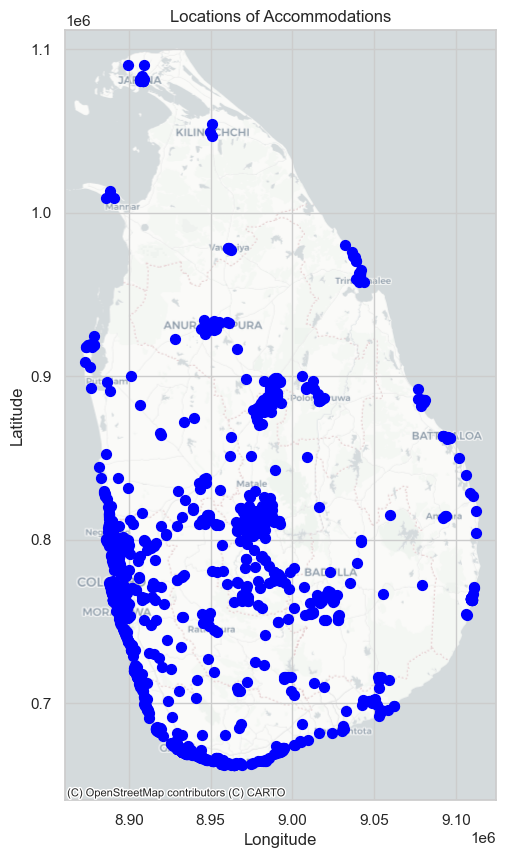

In [38]:

!pip install contextily
import contextily as ctx

# Convert the DataFrame to a GeoDataFrame
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.Logitiute, df.Latitude))

# Set the coordinate reference system to WGS84
gdf.crs = 'EPSG:4326'

# Convert the GeoDataFrame to Web Mercator for contextily
gdf = gdf.to_crs(epsg=3857)

# Plotting
fig, ax = plt.subplots(figsize=(10, 10), facecolor='white')
gdf.plot(ax=ax, color='blue', markersize=50)
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)

plt.title('Locations of Accommodations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.show()

(1367, 10)

c:\Users\amila.w\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


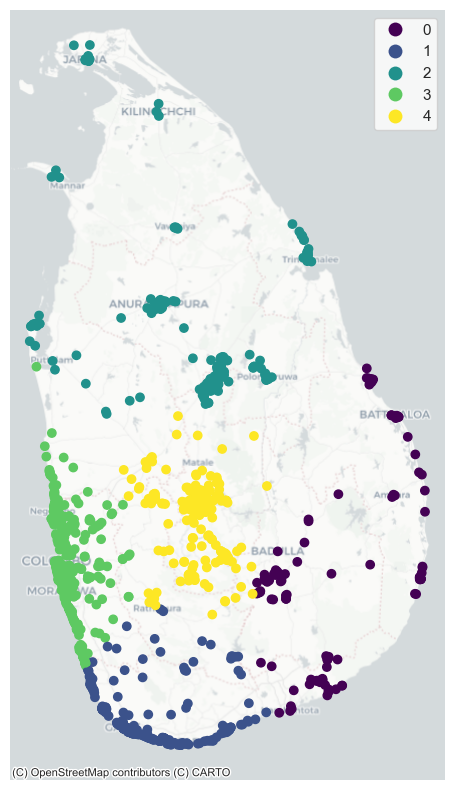

In [40]:
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Assuming 'accommodation_df_cleaned' is your cleaned DataFrame with 'Logitiute' and 'Latitude' columns
# Convert the cleaned dataframe to a GeoDataFrame

# Removing rows with missing values in 'Logitiute' and 'Latitude'
df_cleaned = df.dropna(subset=['Logitiute', 'Latitude'])

# Check the shape of the cleaned dataframe
display(df_cleaned.shape)
gdf = gpd.GeoDataFrame(df_cleaned, geometry=gpd.points_from_xy(df_cleaned.Logitiute, df_cleaned.Latitude))

# Standardizing the coordinates
scaler = StandardScaler()
coordinates_scaled = scaler.fit_transform(gdf[['Logitiute', 'Latitude']])

# K-Means Clustering
kmeans = KMeans(n_clusters=5, random_state=42).fit(coordinates_scaled)
gdf['cluster'] = kmeans.labels_

# Correcting the error by explicitly setting the CRS for the GeoDataFrame
gdf.crs = 'EPSG:4326'

# Plotting on a map
fig, ax = plt.subplots(1, 1, figsize=(10, 10), facecolor='white')
gdf.plot(column='cluster', ax=ax, legend=True, categorical=True, legend_kwds={'bbox_to_anchor': (1, 1)}, marker='o', cmap='viridis')
ctx.add_basemap(ax, crs=gdf.crs, source=ctx.providers.CartoDB.Positron)
ax.set_axis_off()
plt.show()

In [43]:
df.isnull().sum()

Type                  0
Name                  0
Address               0
Rooms                 0
Grade               293
District              0
AGA Division         19
PS/MC/UC              3
Logitiute           762
Latitude            760
Western Province      0
dtype: int64